# Imports
##### Import pandas, numpy, matplotlib and seaborn. Set %matplotlip inline

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### hide warning from showing in jupyter notebook

In [94]:
import warnings
warnings.filterwarnings('ignore')

# Get the Data

In [95]:
path = "/Users/mavelar1/Desktop/CISD43 FINAL PROJECT/CISD43 FINAL PROJECT/data/nba.csv"

nba = pd.read_csv(path)

#### Check the head of dataset, and check info() and describe() methods

In [96]:
nba.head()

Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0

In [97]:
nba.describe()

Number         Age      Weight        Salary
count  457.000000  457.000000  457.000000  4.460000e+02
mean    17.678337   26.938731  221.522976  4.842684e+06
std     15.966090    4.404016   26.368343  5.229238e+06
min      0.000000   19.000000  161.000000  3.088800e+04
25%      5.000000   24.000000  200.000000  1.044792e+06
50%     13.000000   26.000000  220.000000  2.839073e+06
75%     25.000000   30.000000  240.000000  6.500000e+06
max     99.000000   40.000000  307.000000  2.500000e+07

In [98]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


# Exploratory Data Analysis

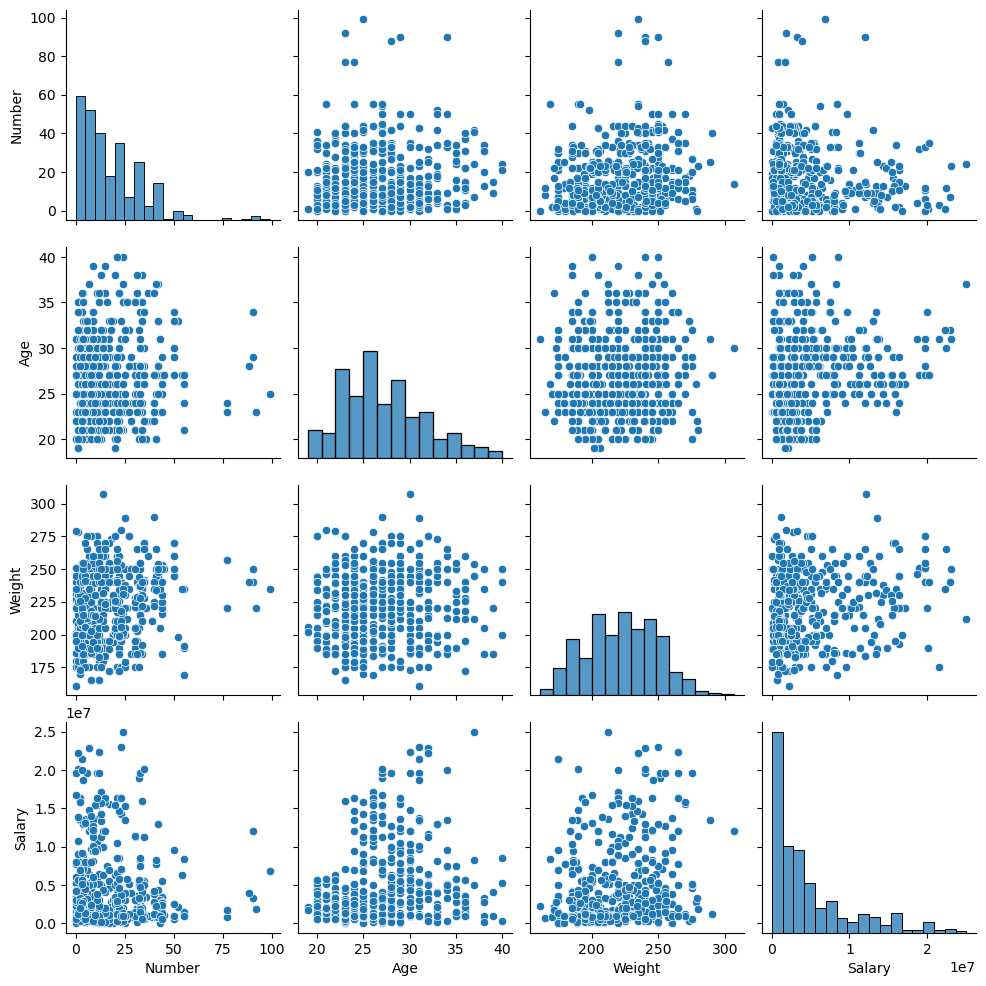

In [99]:
sns.pairplot(nba)

#### Most correlated feature with Salary is Age

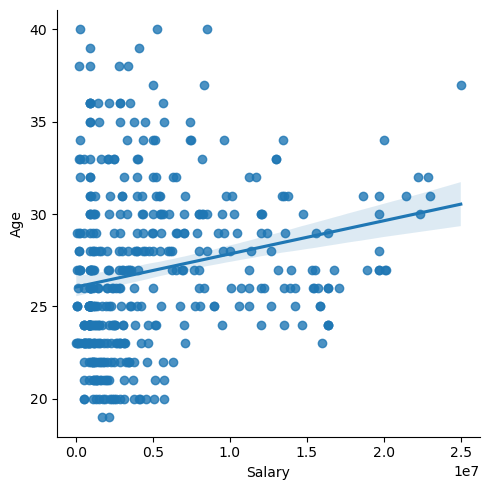

In [100]:
sns.lmplot(x='Salary',y='Age',data=nba)

In [101]:
nba.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [102]:
X = nba[['Age']]
y = nba['Salary']

#### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.2 and random_state=101

In [103]:
#train_test_split
from sklearn.model_selection import train_test_split

In [104]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state=101)

# Training the model

In [105]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [106]:
model = LinearRegression()

In [107]:
print("Checking for NaNs in X_train:", np.isnan(X_train).sum())
print("Checking for NaNs in y_train:", np.isnan(y_train).sum())

Checking for NaNs in X_train: Age    1
dtype: int64
Checking for NaNs in y_train: 8


In [108]:
nba['Salary'] = nba['Salary'].fillna(nba['Salary'].mean())
nba['Age'] = nba['Age'].fillna(nba['Age'].mean())

In [113]:
print("Columns with NaNs:")
print(X_train.isna().sum())

Columns with NaNs:
Age    1
dtype: int64


In [92]:
model.fit(X_train_imputed, y_train)

NameError: name 'X_train_imputed' is not defined

In [ ]:
print('Coefficients: \n', model.coef_)

In [ ]:
predictions = model.predict(X_test)

In [47]:
if len(y_train) != len(predictions):
    min_length = min(len(y_train), len(predictions))
    y_train = y_train[:min_length]
    predictions = predictions[:min_length]

plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions, alpha=0.5, label='Predictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--r', alpha=0.5, label='Perfect Prediction')
plt.title('Real vs. Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'predictions' is not defined

In [48]:
#import metrics from sklearn
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

NameError: name 'predictions' is not defined